In [1]:
import keras
from keras.models import Sequential
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Métodos auxiliares

Se proporcionan ciertos métodos para la visualización de gráficos. 

In [2]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()

### 1. Diagnóstico y solución de un modelo I

Creamos el dataset para un problema de clasificación multiclase con las siguientes propiedades:
- 1000 ejemplos (*n_samples*)
- 50 atributos (*n_features*)
- 25 de ellos "informativos", es decir, valiosos (*n_informative*)
- 4 clases de salida (*n_classes*)
- Cada clase agrupada en un clúster (*n_clusters_per_class*)
- Un 30% de las clases de salida se asignarán aleatoriamente, introduciendo ruido en el conjunto de datos (*flip_y*)

El atributo *random_state* se utiliza como semilla para la generación de aleatoriedad. Si fijamos la semilla nos aseguramos que los datos siempre serán los mismos para distintas ejecuciones.

El conjunto de datos lo dividiremos en los 3 subconjuntos correspondientes: train, validation y test. Lo repartiremos de la siguiente manera:
- 64% de los datos para train
- 16% de los datos para validación
- 20% de los datos para test

In [3]:
#NOTOCAR
X, y = make_classification(n_samples=1000, n_features=50, n_informative=25, n_redundant=0, n_classes = 4, n_clusters_per_class = 1, flip_y = 0.3, random_state=45)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.2)

Creamos el modelo **modelo_1** que vamos a usar como base y sobre el cual habrá que dar un diagnóstico de su desempeño sobre el conjunto de datos creamos anteriormente. Originalmente, el diseño del modelo será el siguiente:
- Una capa de entrada de 50 neuronas
- 2 hidden layers de 2056 y 1024 neuronas, respectivamente, que usarán ReLU como función de activación
- 1 capa de salida adaptada al problema de clasificación multiclase

Es importante usar el método *clear_session* para limpiar el grafo de computación del modelo y empezar de cero

In [4]:
#NOTOCAR
tf.keras.backend.clear_session()
modelo_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2056, input_shape = (50,), activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Con la llamada al método *summary* podemos ver cierta información sobre la arquitectura del modelo:
- La secuencia de capas con sus tamaños
- El número de parámetros entrenables y no que tiene la red, desglosados por capa y totales

In [5]:
#NOTOCAR
modelo_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2056)              104856    
                                                                 
 dense_1 (Dense)             (None, 1024)              2106368   
                                                                 
 dense_2 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 2,215,324
Trainable params: 2,215,324
Non-trainable params: 0
_________________________________________________________________


Compilación del modelo, utilizando Adam como optimizador y la función de coste apropiada para el problema de clasificación multiclase:

In [6]:
#NOTOCAR
modelo_1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Entrenamiento del modelo, durante 20 épocas, utilizando un tamaño de batch de 256 y utilizando el subconjunto creado anteriormente para validar:

In [7]:
#NOTOCAR
N_EPOCAS = 20
history_1 = modelo_1.fit(X_train_1, y_train_1, epochs=N_EPOCAS, batch_size = 256, validation_data=(X_val_1, y_val_1))

Epoch 1/20
3/3 [==============================] - 1s 184ms/step - loss: 1.8083 - accuracy: 0.3000 - val_loss: 2.1271 - val_accuracy: 0.4625
Epoch 2/20
3/3 [==============================] - 0s 79ms/step - loss: 1.3370 - accuracy: 0.5484 - val_loss: 1.4558 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 0s 98ms/step - loss: 0.8845 - accuracy: 0.6844 - val_loss: 1.3214 - val_accuracy: 0.5125
Epoch 4/20
3/3 [==============================] - 0s 103ms/step - loss: 0.8097 - accuracy: 0.7063 - val_loss: 1.2233 - val_accuracy: 0.5688
Epoch 5/20
3/3 [==============================] - 0s 106ms/step - loss: 0.6566 - accuracy: 0.8000 - val_loss: 1.3016 - val_accuracy: 0.5437
Epoch 6/20
3/3 [==============================] - 0s 94ms/step - loss: 0.5999 - accuracy: 0.8031 - val_loss: 1.3534 - val_accuracy: 0.5750
Epoch 7/20
3/3 [==============================] - 0s 103ms/step - loss: 0.4937 - accuracy: 0.8500 - val_loss: 1.3677 - val_accuracy: 0.5688
Epoch 8/20
3/3 [=======

Mostramos resultados de *accuracy* y *loss* utilizando los métodos auxiliares proporcionados al inicio de la práctica:

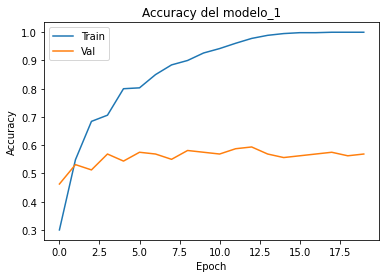

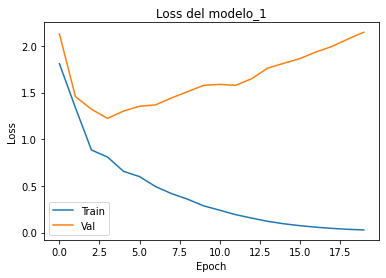

In [8]:
#NOTOCAR
plot_acc(history_1, title = "Accuracy del modelo_1")
plot_loss(history_1, title = "Loss del modelo_1")

Evaluamos el rendimiento del **modelo_1** ya entrenado sobre el conjunto de test:

In [9]:
#NOTOCAR
metricas = modelo_1.evaluate(X_test_1, y_test_1)
print("Accuracy del modelo_1 en test:", metricas[1])
print("Loss del modelo_1 en test:", metricas[0])

7/7 [==============================] - 0s 5ms/step - loss: 1.6494 - accuracy: 0.6400
Accuracy del modelo_1 en test: 0.6399999856948853
Loss del modelo_1 en test: 1.6494008302688599


#### 1.1. Diagnóstico

Una vez creado, entrenado y evaluado el modelo, es momento de sacar conclusiones. Hay que recordar que el problema que estamos enfrentando tiene 4 clases, por lo que si la decisión del modelo fuese completamente al azar, obtendría en torno a un 25% de accuracy. Observa el valor de *accuracy* en test, es evidente que algo le ocurre al **modelo_1**.

Explica lo que consideras que le está ocurriendo, acompañado del mayor número de evidencias y explicaciones posibles. Puedes usar tanto celdas de texto como de código por si consideras necesario ejecutar alguna prueba adicional.

El problema que esta ocurriendo es que la red neuronal esta memorizando los datos de entrenamiento causando lo que se denomina como overfitting o sobreentrenamiento. Esto se puede evidenciar claramente en la gráfica de Acurracy y de Loss, donde se observa un mejor comportamiento en los datos de entrenamiento comparado con los datos de Val. Adicionalmente, mientras el accuracy sigue aumentando para los datos de entrenamiento conforme aumenta el número de epocas, en los datos de Val se llega a un punto máximo y luego el accuracy vuelve a bajar terminando en un modelo ineficiente. En los datos de test, también se puede observar un accuracy bajo (0.64) comparado con el obtenido al entrenar la red.

#### 1.2. Modelo optimizado

Se implementó una red neuronal con las mismas dos capas pero con menor cantidad de neuronas por capa con el fin de reducir la complejidad de la red y evitar el sobreajuste. Se añadio regulizadores para compensar el sobreajuste. Se añadió un regulizador `L2` en cada capa con una baja penalización (0.01) para no afectar el accuracy, además, tiene un buen comportamiento junto con el optimizador `adam`. Se añadió también un `Dropout` con una tasa del abandono del 50% que entrego buenos resultados. Las funciones de activación se dejaron las mismas ya que entregaron un buen accuracy.

In [267]:
tf.keras.backend.clear_session()
modelo_1_v2 = tf.keras.models.Sequential([
    # Tu modelo aquí
    tf.keras.layers.Dense(512, input_shape = (50,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

Resumen de la arquitectura de la red:

In [268]:
modelo_1_v2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               26112     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 158,468
Trainable params: 158,468
Non-trainable params: 0
_________________________________________________________________


El optimizador `adam` tuvo un buen comportamiento tanto en términos de sobreajuste como en accuracy en los datos de test. 

In [269]:
modelo_1_v2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Se añadió un callback para monitorear el `val_loss` y evitar aún más el sobreajuste. Se colocó una `patience` de dos para detener el entrenamiento si no hay mejora luego de dos épocas consecutivas.

In [270]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

Aparte del Early Stopping no se realizó ninguna otra modificación en el entrenamiento.

In [271]:
history_1_v2 = modelo_1_v2.fit(X_train_1, y_train_1, epochs=N_EPOCAS, batch_size = 256, validation_data=(X_val_1, y_val_1), callbacks=[early_stop])

Epoch 1/20
3/3 [==============================] - 1s 139ms/step - loss: 6.2320 - accuracy: 0.2750 - val_loss: 5.5626 - val_accuracy: 0.3688
Epoch 2/20
3/3 [==============================] - 0s 41ms/step - loss: 5.8086 - accuracy: 0.3734 - val_loss: 5.3985 - val_accuracy: 0.4688
Epoch 3/20
3/3 [==============================] - 0s 33ms/step - loss: 5.5363 - accuracy: 0.4500 - val_loss: 5.3044 - val_accuracy: 0.5250
Epoch 4/20
3/3 [==============================] - 0s 36ms/step - loss: 5.2710 - accuracy: 0.5063 - val_loss: 5.2040 - val_accuracy: 0.5375
Epoch 5/20
3/3 [==============================] - 0s 30ms/step - loss: 5.1457 - accuracy: 0.5344 - val_loss: 5.0896 - val_accuracy: 0.5375
Epoch 6/20
3/3 [==============================] - 0s 31ms/step - loss: 4.8816 - accuracy: 0.6047 - val_loss: 4.9770 - val_accuracy: 0.5312
Epoch 7/20
3/3 [==============================] - 0s 29ms/step - loss: 4.8076 - accuracy: 0.5672 - val_loss: 4.8629 - val_accuracy: 0.5375
Epoch 8/20
3/3 [==========

En las siguientes gráficas, se evidencia que el problema del sobreajuste se ha mejorado notoriamente con los nuevos ajustes de la red:

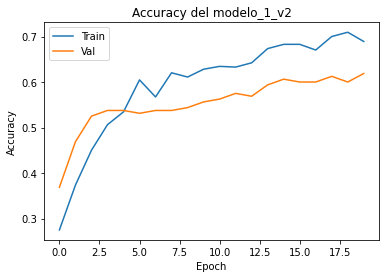

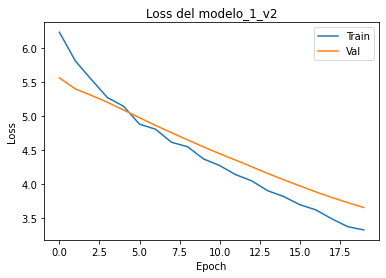

In [272]:
plot_acc(history_1_v2, title = "Accuracy del modelo_1_v2")
plot_loss(history_1_v2, title = "Loss del modelo_1_v2")

Pese a que se consiguió solucionar el sobreajuste, no se mejoró significativamente el accuracy en los datos de test, es posible que se necesite aumentar las épocas de entrenamiento:

In [273]:
metricas = modelo_1_v2.evaluate(X_test_1, y_test_1)
print("Accuracy del modelo_1 en test:", metricas[1])
print("Loss del modelo_1 en test:", metricas[0])

7/7 [==============================] - 0s 3ms/step - loss: 3.4356 - accuracy: 0.6650
Accuracy del modelo_1 en test: 0.6650000214576721
Loss del modelo_1 en test: 3.435628890991211


### 2. Diagnóstico y solución de un modelo II

Creamos el modelo de referencia para diagnosticar y solucionar el problema, que lo almacenaremos en la variable **modelo_2**. Este tendrá las siguientes características:
- Una capa de entrada de 50 neuronas
- 2 hidden layers de 12 y 8 neuronas, respectivamente, que usarán ReLU como función de activación
- 1 capa de salida adaptada al problema de clasificación multiclase

In [18]:
# NOTOCAR
tf.keras.backend.clear_session()
modelo_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape = (50,), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Mostramos la descripción del modelo:

In [19]:
# NOTOCAR
modelo_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                612       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 752
Trainable params: 752
Non-trainable params: 0
_________________________________________________________________


Su compilación es idéntica a la del **modelo_1**:

In [20]:
#NOTOCAR
modelo_2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

El entrenamiento, como bien se menciona en el enunciado, se va a llevar a cabo usando los mismos subconjuntos que en el ejercicio 1:

In [21]:
#NOTOCAR
history_2 = modelo_2.fit(X_train_1, y_train_1, epochs=N_EPOCAS, batch_size = 256, validation_data=(X_val_1, y_val_1))

Epoch 1/20
3/3 [==============================] - 1s 100ms/step - loss: 2.3149 - accuracy: 0.2703 - val_loss: 2.3186 - val_accuracy: 0.2875
Epoch 2/20
3/3 [==============================] - 0s 27ms/step - loss: 2.2357 - accuracy: 0.2750 - val_loss: 2.2571 - val_accuracy: 0.2937
Epoch 3/20
3/3 [==============================] - 0s 33ms/step - loss: 2.1616 - accuracy: 0.2828 - val_loss: 2.2001 - val_accuracy: 0.3000
Epoch 4/20
3/3 [==============================] - 0s 22ms/step - loss: 2.0943 - accuracy: 0.2906 - val_loss: 2.1469 - val_accuracy: 0.3063
Epoch 5/20
3/3 [==============================] - 0s 24ms/step - loss: 2.0290 - accuracy: 0.2984 - val_loss: 2.0961 - val_accuracy: 0.3125
Epoch 6/20
3/3 [==============================] - 0s 23ms/step - loss: 1.9698 - accuracy: 0.3078 - val_loss: 2.0475 - val_accuracy: 0.3250
Epoch 7/20
3/3 [==============================] - 0s 22ms/step - loss: 1.9127 - accuracy: 0.3109 - val_loss: 2.0018 - val_accuracy: 0.3250
Epoch 8/20
3/3 [==========

Mostramos las gráficas de *accuracy* y *loss*:

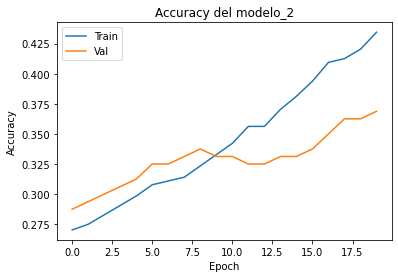

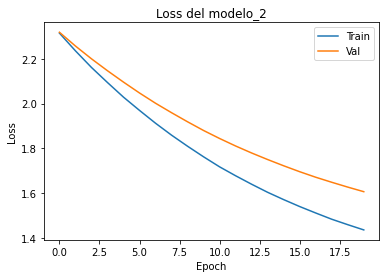

In [22]:
#NOTOCAR
plot_acc(history_2, title = "Accuracy del modelo_2")
plot_loss(history_2, title = "Loss del modelo_2")

Evaluamos el rendimiento del **modelo_2** ya entrenado sobre el conjunto de test:

In [23]:
#NOTOCAR
metricas = modelo_2.evaluate(X_test_1, y_test_1)
print("Accuracy del modelo_2 en test:", metricas[1])
print("Loss del modelo_2 en test:", metricas[0])

7/7 [==============================] - 0s 2ms/step - loss: 1.3984 - accuracy: 0.4100
Accuracy del modelo_2 en test: 0.4099999964237213
Loss del modelo_2 en test: 1.398358941078186


#### 2.1. Diagnóstico

Una vez creado, entrenado y evaluado el modelo, es momento de sacar conclusiones. Hay que recordar que el problema que estamos enfrentando tiene 4 clases, por lo que si la decisión del modelo fuese completamente al azar, obtendría en torno a un 25% de accuracy. Observa el valor de *accuracy* en test, es evidente que algo le ocurre al **modelo_2**.

Explica lo que consideras que le está ocurriendo, acompañado del mayor número de evidencias y explicaciones posibles. Puedes usar tanto celdas de texto como de código por si consideras necesario ejecutar alguna prueba adicional.

In [24]:
# Respuesta aquí

El problema que esta ocurriendo es `underfitting` o subajuste, ya que se obtiene un bajo accuracy en los datos de entrenamiento y también en los datos de test. Esto también se evidencia en las gráficas de accuracy y de Loss. En la del accuracy se puede observar que ambas tendencias no consiguen un incremento significativo pese a que la de train sea ligeramente mejor, por lo que se descarta el overfitting.

#### 2.2. Modelo optimizado

Se aumentó la complejidad de la red neuronal para intentar solucionar el problema sin introducir overfitting. Se aumentó una capa más y se incrementaron las neuronas por capa. Las funciones de activación se colocaron en Sigmoide ya que se consigue mejores resultados en términos de accuracy. No fue necesario añadir regulizadores.

In [408]:
tf.keras.backend.clear_session()
modelo_2_v2 = tf.keras.models.Sequential([
    # Tu modelo aquí
    tf.keras.layers.Dense(1024, input_shape = (50,), activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [409]:
# Usa todas las celdas que necesites, acompañadas de justificaión en celdas de texto

Resumen del modelo

In [410]:
modelo_2_v2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              52224     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 610,116
Trainable params: 610,116
Non-trainable params: 0
_________________________________________________________________


Se utilizó `adam` como optimizador, puesto que solucionaba el problema sin generar sobreajuste notorio.

In [411]:
modelo_2_v2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

El entrenamiento, como bien se menciona en el enunciado, se va a llevar a cabo usando los mismos subconjuntos que en el ejercicio 2. Adicionalmente, se utilizó Early Stopping para evitar sobreajuste:

In [412]:
history_2_v2 = modelo_2_v2.fit(X_train_1, y_train_1, epochs=N_EPOCAS, batch_size = 256, validation_data=(X_val_1, y_val_1), callbacks=[early_stop])

Epoch 1/20
3/3 [==============================] - 2s 174ms/step - loss: 1.4275 - accuracy: 0.2656 - val_loss: 1.4405 - val_accuracy: 0.2750
Epoch 2/20
3/3 [==============================] - 0s 40ms/step - loss: 1.3984 - accuracy: 0.2875 - val_loss: 1.3681 - val_accuracy: 0.4250
Epoch 3/20
3/3 [==============================] - 0s 47ms/step - loss: 1.3451 - accuracy: 0.3469 - val_loss: 1.3494 - val_accuracy: 0.4375
Epoch 4/20
3/3 [==============================] - 0s 69ms/step - loss: 1.3059 - accuracy: 0.4625 - val_loss: 1.3164 - val_accuracy: 0.4313
Epoch 5/20
3/3 [==============================] - 0s 54ms/step - loss: 1.2676 - accuracy: 0.4906 - val_loss: 1.2841 - val_accuracy: 0.4500
Epoch 6/20
3/3 [==============================] - 0s 56ms/step - loss: 1.2234 - accuracy: 0.5203 - val_loss: 1.3116 - val_accuracy: 0.4437
Epoch 7/20
3/3 [==============================] - 0s 57ms/step - loss: 1.1979 - accuracy: 0.5484 - val_loss: 1.2585 - val_accuracy: 0.4875
Epoch 8/20
3/3 [==========

En las siguientes gráficas, se evidencia que el problema del subajuste o underfitting se ha mejorado notoriamente con los nuevos ajustes de la red, mejorando el accuracy:

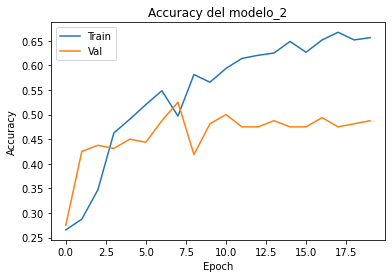

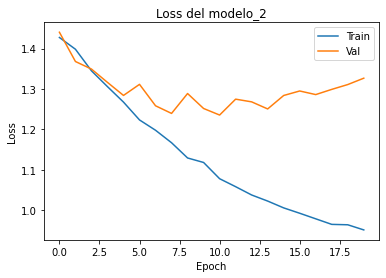

In [413]:
plot_acc(history_2_v2, title = "Accuracy del modelo_2")
plot_loss(history_2_v2, title = "Loss del modelo_2")

El `accuracy` se mejoró notoriamente en comparación con la primera arquitectura de la red:

In [414]:
metricas = modelo_2_v2.evaluate(X_test_1, y_test_1)
print("Accuracy del modelo_2 en test:", metricas[1])
print("Loss del modelo_2 en test:", metricas[0])

7/7 [==============================] - 0s 5ms/step - loss: 1.1283 - accuracy: 0.5850
Accuracy del modelo_2 en test: 0.5849999785423279
Loss del modelo_2 en test: 1.1283478736877441


### 3. Libertad para diseñar un modelo

En este tercer y último ejercicio, serás (prácticamente) libre para crear tu propia red neuronal que resuelva un problema de clasificación multiclase. El objetivo será que diseñes, entrenes y evalúes tu propio modelo, obteniendo con ello las mejores métricas posibles en el conjunto de test. Tan fácil (o no) como eso. La evaluación dependerá de las explicaciones en cuanto al diseño y entrenamiendo, así como al resultado de accuracy obtenido.

Tendrás que utilizar el conjunto de datos que se va a crear a continuación definido por **X_2** e **y_2**, que tiene las siguientes propiedades:
- 10000 registros
- 40 atributos, 5 de ellos "informativos"
- 4 clases de salida
- Un 10% de aleatoriedad en la salida

Se crearán los subconjuntos **X_train_2**, **X_val_2**, **X_test_2**, **y_train_2**,**y_val_2**,**y_test_2** sigún la siguiente división:
- 64% de los datos para train
- 16% de los datos para validación
- 20% de los datos para test

In [32]:
#NOTOCAR
X_2, y_2 = make_classification(n_samples=10000, n_informative = 5, n_features=40, n_classes = 4, flip_y = 0.1, random_state=45)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.2)

A partir de aquí habrá que diseñar, compilar, entrenar y evaluar el modelo. La única restricción será que el modelo debe de tener, al menos, 3 capas ocultas. Es la única restricción de aquí en adelante. Usa todas las celdas que consideres necesario para argumentar tu diseño y tu modelo final.

Acuérdate de considerar todas las opciones que se han visto en clase referentes a:
- Distintos optimizadores
- Distintas funciones de activación
- Distintos tipos de capas
- Distintas funciones de coste
- Distintas técnicas de regularización
- Distinto número de batch_size y épocas
- Distintos inicializadores de pesos

Realiza experimentos y juega con Keras. Acuérdate de intentar justificar los motivos por los que la red funciona mejor con una características u otra. Debido a que los datos se están generando de manera sintética y no hemos llevado a cabo el proceso de EDA, no podemos sacar todas las conclusiones ni diseñar una arquitectura acorde a los datos. Por eso el proceso será prueba y error, siempre de la manera más justificada posible.

Se implementó una red neuronal con 3 capas ocultas. No se aumentaron el número de capas puesto que no se conseguía una mejora notoria y en algunos casos se reducía el accuracy. Se colocarón 512, 256 y 64 neuronas para cada capa, respectivamente. De igual forma, esta cantidad de neuronas por capa demostró ser el valor justo para conseguir un buen accuracy y un buen tiempo de entrenamiento. Se utilizó la función de activación `sigmoide` puesto que subió alrederor de 8% el accuracy obtenido. No fue necesario utilizar regulizadores, puesto que no se consiguió overfitting, ademas de que afectaban el accuracy final. Tampoco se consideró inicializadores de pesos puesto que no afectaban significativamente el resultado.

In [394]:
tf.keras.backend.clear_session()
modelo_3 = tf.keras.models.Sequential([
    # Diseña tu modelo aquí
    tf.keras.layers.Dense(512, input_shape = (40,), activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Resumen del modelo

In [395]:
modelo_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               20992     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 169,028
Trainable params: 169,028
Non-trainable params: 0
_________________________________________________________________


Se utilizó el optimizador `adam` puesto que entregó buenos resultados en accuracy y en términos de ajuste. La función de pérdida se colocó en `sparse_categorical_crossentropy` para evitar utilizar One Hot Coding.

In [396]:
modelo_3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Se añadió un `early_stopping` para detener el entrenamiento luego de no obtener una mejora en la red después de 10 épocas.

In [397]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Se entrenó la red con 80 épocas, valor justo y necesario para mejorar la red sin sobreajustarla. El tamaño del lote se mantuvo en 256 puesto que mantenia estable la red y se conseguía un buen tiempo de entrenamiento.

In [398]:
history_3 = modelo_3.fit(X_train_2, y_train_2, epochs=80, batch_size = 256, validation_data=(X_val_2, y_val_2), callbacks=[early_stop])

Epoch 1/80
25/25 [==============================] - 2s 27ms/step - loss: 1.4264 - accuracy: 0.2670 - val_loss: 1.3693 - val_accuracy: 0.3950
Epoch 2/80
25/25 [==============================] - 0s 12ms/step - loss: 1.3240 - accuracy: 0.4231 - val_loss: 1.2829 - val_accuracy: 0.4044
Epoch 3/80
25/25 [==============================] - 0s 14ms/step - loss: 1.2094 - accuracy: 0.4966 - val_loss: 1.1413 - val_accuracy: 0.5744
Epoch 4/80
25/25 [==============================] - 0s 12ms/step - loss: 1.0749 - accuracy: 0.5841 - val_loss: 1.0140 - val_accuracy: 0.6288
Epoch 5/80
25/25 [==============================] - 0s 12ms/step - loss: 0.9857 - accuracy: 0.6037 - val_loss: 0.9548 - val_accuracy: 0.6313
Epoch 6/80
25/25 [==============================] - 0s 12ms/step - loss: 0.9460 - accuracy: 0.6212 - val_loss: 0.9324 - val_accuracy: 0.6406
Epoch 7/80
25/25 [==============================] - 0s 12ms/step - loss: 0.9298 - accuracy: 0.6272 - val_loss: 0.9287 - val_accuracy: 0.6469
Epoch 8/80
25

Epoch 59/80
25/25 [==============================] - 0s 13ms/step - loss: 0.5348 - accuracy: 0.8245 - val_loss: 0.6087 - val_accuracy: 0.8062
Epoch 60/80
25/25 [==============================] - 0s 12ms/step - loss: 0.5283 - accuracy: 0.8333 - val_loss: 0.6097 - val_accuracy: 0.8025
Epoch 61/80
25/25 [==============================] - 0s 13ms/step - loss: 0.5233 - accuracy: 0.8342 - val_loss: 0.6142 - val_accuracy: 0.8044
Epoch 62/80
25/25 [==============================] - 0s 13ms/step - loss: 0.5226 - accuracy: 0.8341 - val_loss: 0.6104 - val_accuracy: 0.7994
Epoch 63/80
25/25 [==============================] - 0s 14ms/step - loss: 0.5205 - accuracy: 0.8363 - val_loss: 0.6136 - val_accuracy: 0.8006
Epoch 64/80
25/25 [==============================] - 0s 12ms/step - loss: 0.5206 - accuracy: 0.8339 - val_loss: 0.6160 - val_accuracy: 0.8037
Epoch 65/80
25/25 [==============================] - 0s 11ms/step - loss: 0.5086 - accuracy: 0.8388 - val_loss: 0.6051 - val_accuracy: 0.8112
Epoch 

Resultados del entrenamiento:

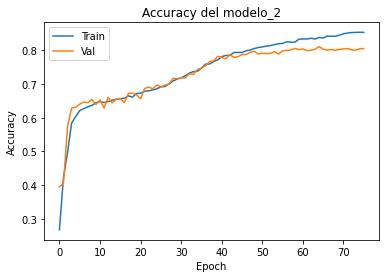

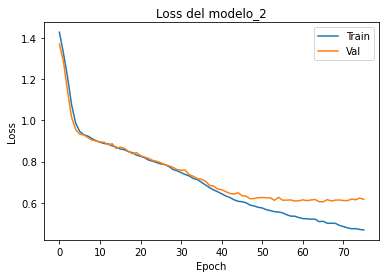

In [399]:
plot_acc(history_3, title = "Accuracy del modelo_2")
plot_loss(history_3, title = "Loss del modelo_2")

Se obtuvo un `accuracy` del 80%:

In [400]:
metricas = modelo_3.evaluate(X_test_2, y_test_2)
print("Accuracy del modelo_3 en test:", metricas[1])
print("Loss del modelo_3 en test:", metricas[0])

63/63 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.8020
Accuracy del modelo_3 en test: 0.8019999861717224
Loss del modelo_3 en test: 0.6124211549758911
